# Chapter 2: Sampling, Fourier Transform, and Convolution

## Áp dụng tích chập vào hình ảnh thang độ xám

## 1. Các thư viện cần thiết

In [1]:
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal

from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np




im = rgb2gray(imread('../images/cameraman.jpg')).astype(float)

# (225, 225)




## 2. Giải Thích Code

**`blur_box_kernel = np.ones((3,3)) / 9`:**
-   Tạo ra một **kernel (bộ lọc)** kích thước 3×33 \times 33×3 với các phần tử đều bằng 19\frac{1}{9}91​.
-   Đây là bộ lọc hộp trung bình (box blur) để làm mờ ảnh, mỗi pixel trong vùng 3×33 \times 33×3 được tính trung bình cộng với các pixel lân cận.
-   **Kết quả:** Làm mờ ảnh, giảm chi tiết nhỏ và nhiễu
**`edge_laplace_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])`:**
-   Tạo bộ lọc Laplace 3×3 để phát hiện biên cạnh (edges).
-   Bộ lọc này tính toán các thay đổi cường độ (gradient) giữa một pixel trung tâm và các pixel lân cận. Nó nhấn mạnh các vùng có thay đổi lớn (biên cạnh).
**im\_blurred = signal.convolve2d(im, blur\_box\_kernel):**
*   Áp dụng phép **tích chập 2D** (2D convolution) giữa ảnh im và kernel blur\_box\_kernel.
*   Hàm signal.convolve2d tính giá trị trung bình cộng các pixel lân cận trong cửa sổ 3×3.


In [2]:
blur_box_kernel = np.ones((3,3)) / 9
edge_laplace_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
im_blurred = signal.convolve2d(im, blur_box_kernel)
im_edges = np.clip(signal.convolve2d(im, edge_laplace_kernel), 0, 1)

**fig, axes = pylab.subplots(ncols=3, sharex=True, sharey=True, figsize=(18,6)):**
*   Tạo một lưới các **subplot** để hiển thị nhiều hình ảnh:
    *   ncols=3: Tạo 3 cột, tức là sẽ có 3 biểu đồ ngang trên cùng một dòng.
    *   sharex=True, sharey=True: Các trục x và y được chia sẻ giữa các biểu đồ, đảm bảo kích thước các hình ảnh nhất quán.
    *   figsize=(18,6): Kích thước tổng của hình vẽ (figure) được đặt là rộng 18 đơn vị và cao 6 đơn vị.

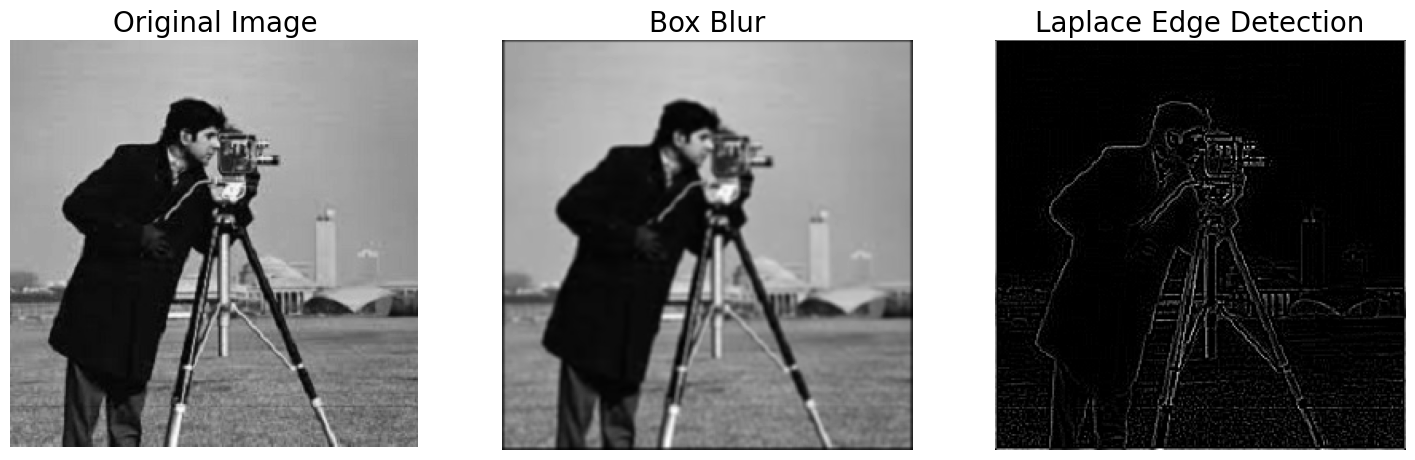

In [3]:
fig, axes = pylab.subplots(ncols=3, sharex=True, sharey=True, figsize=(18,6))
axes[0].imshow(im, cmap=pylab.cm.gray)
axes[0].set_title('Original Image', size=20)
axes[1].imshow(im_blurred, cmap=pylab.cm.gray)
axes[1].set_title('Box Blur', size=20)
axes[2].imshow(im_edges, cmap=pylab.cm.gray)
axes[2].set_title('Laplace Edge Detection', size=20)
for ax in axes:
    ax.axis('off')
pylab.show()